* This notebook focuses on following tasks,
    * Create train/test dataset.
    * EDA.
    * Feature Engineering.
    * Planning next steps to create a prediction model and data analysis.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from pathlib import Path

## Initialize Helper Functions & Constants

In [2]:
## root directory for all data files
data_dir = Path("..", "data")
raw_data_file = Path(data_dir, "student_depression_dataset.csv")

## Read Data

In [3]:
## read data from csv file
data = pd.read_csv(raw_data_file)

In [4]:
## verify the data 
data.shape

(27901, 18)

## Quick Look

* Lets explore the data to,
    * Check for missing data.
    * Identify the column names and types.
    * Identify the targer variable. 

### Exploring Data Columns

In [5]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

* Looks like the `Depression` column is the target variable. 
* Before we confirm that lets change the column names to lower case and remove spaces for simplify management. 

#### Changing Column Names

In [6]:
column_mapping = {}

for col in data.columns:
    column_mapping[col] = "_".join(col.split(" ")).lower()

column_mapping

{'id': 'id',
 'Gender': 'gender',
 'Age': 'age',
 'City': 'city',
 'Profession': 'profession',
 'Academic Pressure': 'academic_pressure',
 'Work Pressure': 'work_pressure',
 'CGPA': 'cgpa',
 'Study Satisfaction': 'study_satisfaction',
 'Job Satisfaction': 'job_satisfaction',
 'Sleep Duration': 'sleep_duration',
 'Dietary Habits': 'dietary_habits',
 'Degree': 'degree',
 'Have you ever had suicidal thoughts ?': 'have_you_ever_had_suicidal_thoughts_?',
 'Work/Study Hours': 'work/study_hours',
 'Financial Stress': 'financial_stress',
 'Family History of Mental Illness': 'family_history_of_mental_illness',
 'Depression': 'depression'}

In [7]:
data.rename(columns={'id': 'id',
                     'Gender': 'gender',
                     'Age': 'age',
                     'City': 'city',
                     'Profession': 'profession',
                     'Academic Pressure': 'academic_pressure',
                     'Work Pressure': 'work_pressure',
                     'CGPA': 'cgpa',
                     'Study Satisfaction': 'study_satisfaction',
                     'Job Satisfaction': 'job_satisfaction',
                     'Sleep Duration': 'sleep_duration',
                     'Dietary Habits': 'dietary_habits',
                     'Degree': 'degree',
                     'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
                     'Work/Study Hours': 'work_study_hours',
                     'Financial Stress': 'financial_stress',
                     'Family History of Mental Illness': 'family_history',
                     'Depression': 'depression'}, inplace=True)

In [8]:
data.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Deleting Columns

In [9]:
## Lets delete the Id column since that won't be useful for analysis or prediction. 
data.drop(columns=["id"],inplace=True)

In [10]:
data.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Saving the Data


In [11]:
## lets save the dataset for future use.
data.to_csv(Path(data_dir,"processed_column_names.csv"),index=False)

In [12]:
data.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [13]:
## lets check for column types and missing values
data.dtypes

gender                 object
age                   float64
city                   object
profession             object
academic_pressure     float64
work_pressure         float64
cgpa                  float64
study_satisfaction    float64
job_satisfaction      float64
sleep_duration         object
dietary_habits         object
degree                 object
suicidal_thoughts      object
work_study_hours      float64
financial_stress       object
family_history         object
depression              int64
dtype: object

Observations:
* So looks like financial stress needs to be `float` but is set to object, this could be because of some missing values. 

In [14]:
## lets check for missing values
data.isnull().sum()

gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep_duration        0
dietary_habits        0
degree                0
suicidal_thoughts     0
work_study_hours      0
financial_stress      0
family_history        0
depression            0
dtype: int64

In [15]:
data.isna().sum()

gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep_duration        0
dietary_habits        0
degree                0
suicidal_thoughts     0
work_study_hours      0
financial_stress      0
family_history        0
depression            0
dtype: int64

In [16]:
data["financial_stress"].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

* So looks like "?" is the only non numeric character in this field

In [17]:
data["financial_stress"].value_counts()

financial_stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

In [18]:
data.loc[data["financial_stress"] == "?",["financial_stress"]] = np.nan

In [19]:
data["financial_stress"].value_counts()

financial_stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [20]:
data.dtypes

gender                 object
age                   float64
city                   object
profession             object
academic_pressure     float64
work_pressure         float64
cgpa                  float64
study_satisfaction    float64
job_satisfaction      float64
sleep_duration         object
dietary_habits         object
degree                 object
suicidal_thoughts      object
work_study_hours      float64
financial_stress       object
family_history         object
depression              int64
dtype: object

In [21]:
## converting to float
data["financial_stress"] = data["financial_stress"].astype("float64")

In [22]:
data.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,financial_stress,depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Observations:
* Most of the data is not skewed and seems to be centrally aligned.
* `work_pressure` and `job_satisfaction` `mean` and `std` values tell us that majority of the data is student data and these 2 fields are mostly zero might be safe to drop them in future. Lets explroe these two columns more. 

### Exploring work_pressure and job_satisfaction

In [23]:
data["work_pressure"].value_counts()

work_pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [24]:
## lets explore the age of students with this work pressure
data.loc[data["work_pressure"] == 5.0,["age"]]

,age
4365,38.0
25746,18.0


In [25]:
data.loc[data["work_pressure"] == 2.0,["age"]]

,age
14855,21.0


Observations:
* Based on my intuition these records do not make sense. The reason is in India students normally start working after the age of 26 27, normally after they graduate.  
* Without additional context and source of dataset its hard to conclude. 
* But since there are just 3 such records we can safely ignore it for now. 

## Visualize Distributions

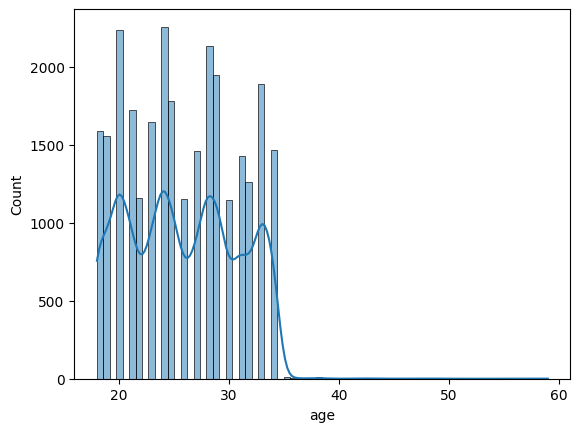

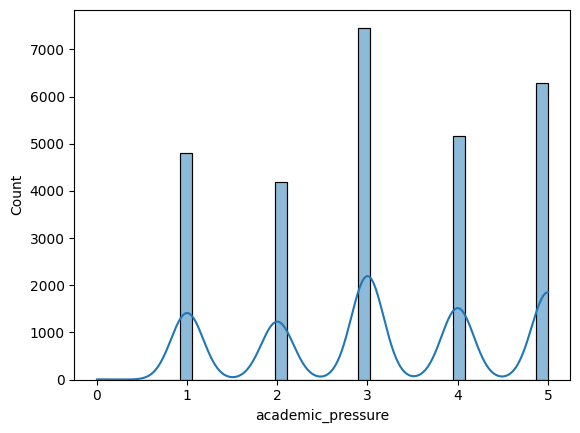

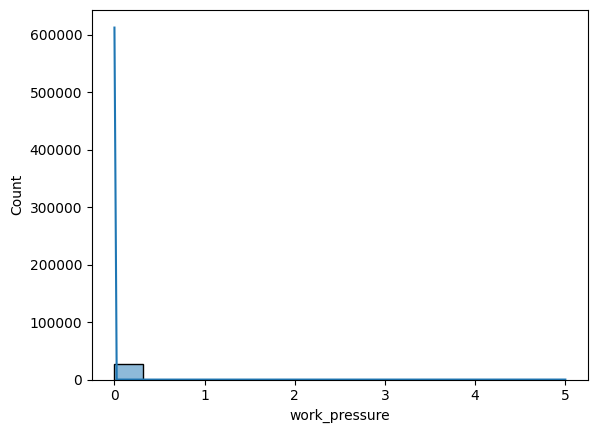

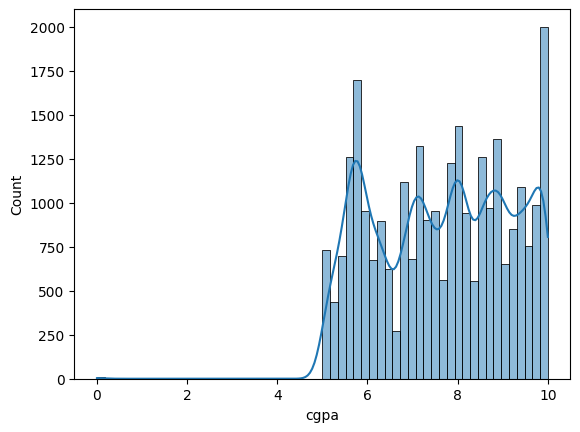

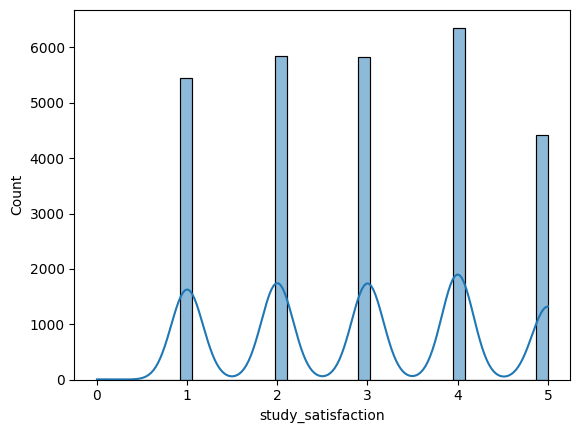

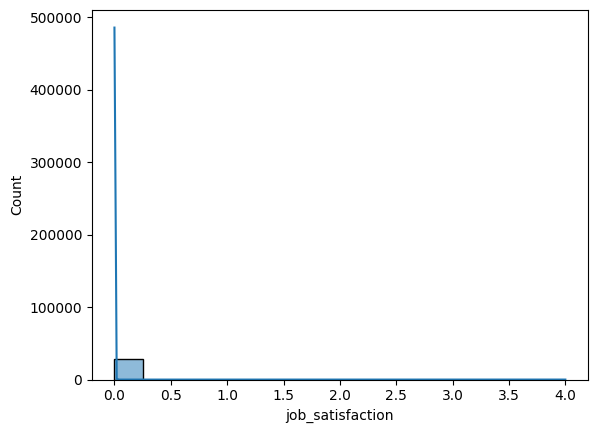

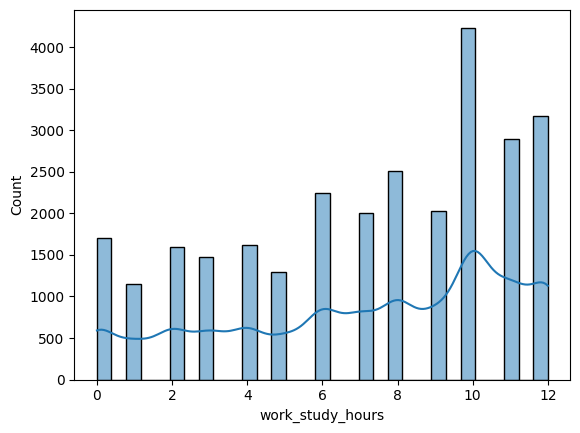

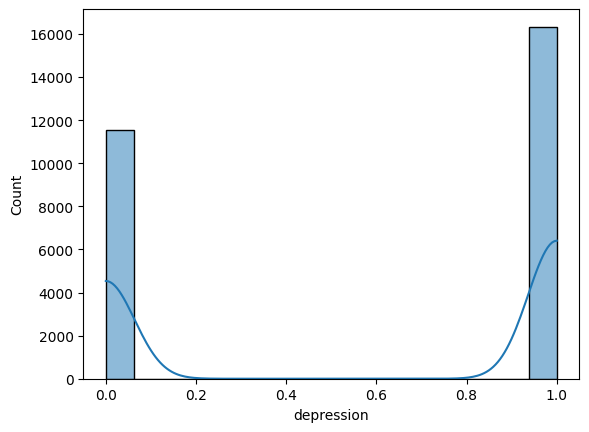

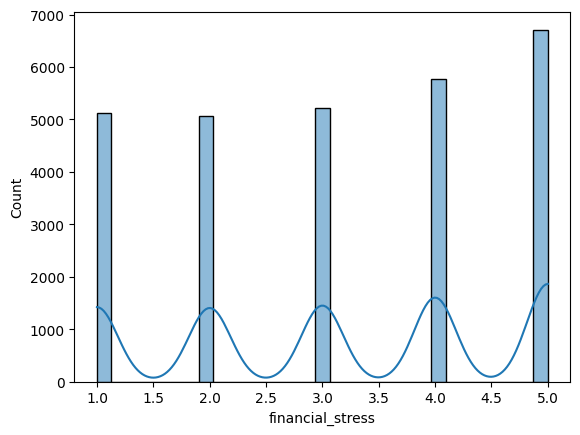

In [26]:
import seaborn as sns
import matplotlib.pyplot as pyt

columns_to_visulize = ["age", "academic_pressure", "work_pressure", "cgpa","study_satisfaction","job_satisfaction","work_study_hours", "depression", "financial_stress"]

for col in columns_to_visulize:
    pyt.figure()
    sns.histplot(data[col], kde=True)

* So the visualizations align with our understanding of dataset,
    * Negligible amout of instances have non-zero "work_pressure" and "job_satisfaction" values, indicating majority of the instances are of a student or unemployed graduates.
    * We do have considerable amout of students above the age of 30 based on this I have a hypothesis there should be an older range of students with higher financial stress and younger range of students with higher academic pressure. 
* For now next step is to do a train/test split before detailed data exploration. We do this to avoid any data snooping. 

## Train/Test Split

In [27]:
data.shape

(27901, 17)

* Lets do a stratified 80/20 train test split, this will give us ~22K training data and 5K testing data. 

In [28]:
## split the dataset into features and target
X = data.drop(columns=["depression"])
y = data["depression"]

In [29]:
X.shape,y.shape

((27901, 16), (27901,))

In [30]:
X.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No


In [31]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: depression, dtype: int64

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i,(train_index,test_index) in enumerate(sss.split(X,y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((22320, 16), (22320,), (5581, 16), (5581,))

In [33]:
## saving the datasets to files for easier access

X_train.to_csv(Path(data_dir,"X_train.csv"), index=False)
y_train.to_csv(Path(data_dir, "y_train.csv"), index=False)
X_test.to_csv(Path(data_dir,"X_test.csv"), index=False)
y_test.to_csv(Path(data_dir, "y_test.csv"), index=False)

## Data Exploration

In [34]:
X_train.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history
1657,Male,18.0,Jaipur,Student,4.0,0.0,6.02,1.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,3.0,5.0,No
24995,Male,25.0,Vadodara,Student,3.0,0.0,6.37,2.0,0.0,'7-8 hours',Moderate,B.Arch,No,9.0,1.0,Yes
27613,Male,30.0,Ahmedabad,Student,3.0,0.0,9.24,2.0,0.0,'7-8 hours',Unhealthy,M.Ed,Yes,5.0,5.0,Yes
13512,Male,34.0,Bhopal,Student,3.0,0.0,7.37,5.0,0.0,'7-8 hours',Moderate,B.Com,Yes,12.0,3.0,No
27029,Male,25.0,Patna,Student,3.0,0.0,7.47,4.0,0.0,'5-6 hours',Unhealthy,B.Com,No,11.0,5.0,No


### Handling Missing Values

In [35]:
X_train.isna().sum()

gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep_duration        0
dietary_habits        0
degree                0
suicidal_thoughts     0
work_study_hours      0
financial_stress      2
family_history        0
dtype: int64

In [36]:
X_train.isnull().sum()

gender                0
age                   0
city                  0
profession            0
academic_pressure     0
work_pressure         0
cgpa                  0
study_satisfaction    0
job_satisfaction      0
sleep_duration        0
dietary_habits        0
degree                0
suicidal_thoughts     0
work_study_hours      0
financial_stress      2
family_history        0
dtype: int64

* So far we only have "financial_stress" with couple NaN values, we can fix this with a SimpleImputer or KNNImputer

### Exploring Categorical Values

In [37]:
## lets explore the "gender" column
X_train["gender"].value_counts()

gender
Male      12437
Female     9883
Name: count, dtype: int64

* Since the dataset has only 2 genders, we'll map them to 1 for "Male" and 0 for "Female".

In [38]:
## lets explore "city" column
X_train["city"].value_counts()

city
Kalyan                  1284
Srinagar                1073
Hyderabad               1063
Vasai-Virar             1042
Lucknow                  943
Thane                    910
Kolkata                  890
Agra                     864
Ludhiana                 848
Surat                    842
Jaipur                   840
Patna                    823
Visakhapatnam            763
Pune                     751
Bhopal                   748
Ahmedabad                748
Chennai                  707
Meerut                   660
Rajkot                   633
Bangalore                625
Delhi                    602
Ghaziabad                588
Mumbai                   563
Vadodara                 561
Varanasi                 550
Nagpur                   533
Indore                   519
Kanpur                   493
Nashik                   452
Faridabad                381
Harsha                     2
Bhavna                     2
Saanvi                     2
City                       2
Khaziabad

* So city column needs some clearning, we can see there are some values which are obviously not a city but rather distances, person names and education degree names. 
* We also have access to a mapping between major Indian cities and their latlong in a different dataset.  We can use that dataset to validate the city names and map latlong to them. 
* Plan is to then use lat-long to create new features based on similarity. 

In [39]:
## lets add a temporary flag column is_city which will be set to 1 if its a valid city.
## we'll also use this in test in case our test data cities are invalid.
X_train["is_city"] = 0

In [40]:
## we'll also add a default lat/long to all cities. 
## for now lets default it center of India
## after searching I learnt that `Nagpur` is the geographical center of India so we'll set the default lat/long to that

X_train["lat"] = 21.122615
X_train["long"] = 79.041124

In [41]:
X_train.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history,is_city,lat,long
1657,Male,18.0,Jaipur,Student,4.0,0.0,6.02,1.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,3.0,5.0,No,0,21.122615,79.041124
24995,Male,25.0,Vadodara,Student,3.0,0.0,6.37,2.0,0.0,'7-8 hours',Moderate,B.Arch,No,9.0,1.0,Yes,0,21.122615,79.041124
27613,Male,30.0,Ahmedabad,Student,3.0,0.0,9.24,2.0,0.0,'7-8 hours',Unhealthy,M.Ed,Yes,5.0,5.0,Yes,0,21.122615,79.041124
13512,Male,34.0,Bhopal,Student,3.0,0.0,7.37,5.0,0.0,'7-8 hours',Moderate,B.Com,Yes,12.0,3.0,No,0,21.122615,79.041124
27029,Male,25.0,Patna,Student,3.0,0.0,7.47,4.0,0.0,'5-6 hours',Unhealthy,B.Com,No,11.0,5.0,No,0,21.122615,79.041124


* Lets read the city list and try to clean up the cities column

In [42]:
## read master city list
city_list = pd.read_csv(Path(data_dir,"in.csv"))
city_list.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6100,77.2300,India,IN,Delhi,admin,32226000,16753235
1,Mumbai,19.0761,72.8775,India,IN,Mahārāshtra,admin,24973000,12478447
2,Kolkāta,22.5675,88.3700,India,IN,West Bengal,admin,18502000,4496694
3,Bangalore,12.9789,77.5917,India,IN,Karnātaka,admin,15386000,8443675
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,12395000,6727000


In [43]:
city_list.shape

(162, 9)

* We only have ~162 cities, which means this might have just the major cities of India, lets see if its enough to cleanup our dataset.

In [44]:
## lower and strip the city list for accurate comparison
cities = city_list["city"].str.strip().str.lower().tolist()
cities 

['delhi',
 'mumbai',
 'kolkāta',
 'bangalore',
 'chennai',
 'hyderābād',
 'pune',
 'ahmedabad',
 'sūrat',
 'lucknow',
 'jaipur',
 'kanpur',
 'mirzāpur',
 'nāgpur',
 'ghāziābād',
 'supaul',
 'vadodara',
 'rājkot',
 'vishākhapatnam',
 'indore',
 'thāne',
 'bhopāl',
 'pimpri-chinchwad',
 'patna',
 'bilāspur',
 'ludhiāna',
 'āgra',
 'madurai',
 'jamshedpur',
 'prayagraj',
 'nāsik',
 'farīdābād',
 'meerut',
 'jabalpur',
 'kalyān',
 'vasai-virar',
 'najafgarh',
 'vārānasi',
 'srīnagar',
 'aurangābād',
 'dhanbād',
 'amritsar',
 'alīgarh',
 'guwāhāti',
 'hāora',
 'rānchi',
 'gwalior',
 'chandīgarh',
 'haldwāni',
 'vijayavāda',
 'jodhpur',
 'raipur',
 'kota',
 'bhayandar',
 'loni',
 'ambattūr',
 'salt lake city',
 'bhātpāra',
 'kūkatpalli',
 'dāsarhalli',
 'muzaffarpur',
 'oulgaret',
 'new delhi',
 'tiruvottiyūr',
 'puducherry',
 'byatarayanpur',
 'pallāvaram',
 'secunderābād',
 'shimla',
 'puri',
 'murtazābād',
 'shrīrāmpur',
 'chandannagar',
 'sultānpur mazra',
 'krishnanagar',
 'bārākpur',
 

In [45]:
def is_valid_city(row):
    row.is_city = int(row.city.strip().lower() in cities)
    return row
    

X_train = X_train.apply(is_valid_city, axis=1)
    

* Lets check the number of valid vs invlid cities

In [46]:
X_train["is_city"].value_counts()

is_city
0    12443
1     9877
Name: count, dtype: int64

In [47]:
X_train.loc[X_train["is_city"] == 0,"city"].value_counts()

city
Kalyan                  1284
Srinagar                1073
Hyderabad               1063
Thane                    910
Kolkata                  890
Agra                     864
Ludhiana                 848
Surat                    842
Visakhapatnam            763
Bhopal                   748
Rajkot                   633
Ghaziabad                588
Varanasi                 550
Nagpur                   533
Nashik                   452
Faridabad                381
Harsha                     2
Bhavna                     2
Saanvi                     2
City                       2
Khaziabad                  1
M.Com                      1
3.0                        1
Harsh                      1
Mihir                      1
M.Tech                     1
Gaurav                     1
Nalyan                     1
Nandini                    1
'Less than 5 Kalyan'       1
Reyansh                    1
'Less Delhi'               1
Mira                       1
Name: count, dtype: int64

In [48]:
city_list["city"].head(5)

0        Delhi
1       Mumbai
2      Kolkāta
3    Bangalore
4      Chennai
Name: city, dtype: object

* So visually it seems the master cities list that we have has "ā" in them instead of "a" thats why a lot of cities are not matching. 
* Lets fix that and then try to update the dataset again. 

In [49]:
import unicodedata

city_list["city"] = city_list["city"].map(lambda ct: unicodedata.normalize("NFKD",ct).encode("ascii","ignore").decode())

In [50]:
city_list["city"].head(5)

0        Delhi
1       Mumbai
2      Kolkata
3    Bangalore
4      Chennai
Name: city, dtype: object

* Looks like this fixed it, lets do the same thing even for our dataset before we map the is_city flag

In [51]:
X_train["city"] = X_train["city"].map(lambda ct: unicodedata.normalize("NFKD",ct).encode("ascii","ignore").decode())

In [52]:
## lower and strip the city list for accurate comparison
cities = city_list["city"].str.strip().str.lower().tolist()

def is_valid_city(row):
    row.is_city = int(row.city.strip().lower() in cities)
    return row
    

X_train = X_train.apply(is_valid_city, axis=1)

In [53]:
X_train["is_city"].value_counts()

is_city
1    21084
0     1236
Name: count, dtype: int64

This is much better now we have only 1236 invalid values. Lets take a look at them

In [54]:
X_train.loc[X_train["is_city"] == 0, "city"].value_counts()

city
Visakhapatnam           763
Nashik                  452
Harsha                    2
Bhavna                    2
Saanvi                    2
City                      2
Khaziabad                 1
M.Com                     1
3.0                       1
Harsh                     1
Mihir                     1
Nalyan                    1
Gaurav                    1
Nandini                   1
'Less than 5 Kalyan'      1
Reyansh                   1
'Less Delhi'              1
M.Tech                    1
Mira                      1
Name: count, dtype: int64

* So apart from Visakhapatnam, Nashik and Khaziabad rest seem to be wrong values. 
* Its surprising that these cities are missing from our master city list, these are few of the larger cities in India. 
* Just to future proof this we'll explore another dataset with a more detailed list of cities that we can rely on. 

In [55]:
## read master city list
master_city_list = pd.read_csv(Path(data_dir,"detailed_in.csv"))
master_city_list.head()

,name,ascii_name,lat,long
0,Rāvi River,Ravi River,30.62123,71.82683
1,Punjab Plains,Punjab Plains,30.00000,75.00000
2,Jhelum River,Jhelum River,31.16853,72.15066
3,Hindustan,Hindustan,28.00000,76.00000
4,Basantar River,Basantar River,32.47452,75.01449


In [62]:
## extract cities and prepare for comparison
master_cities = master_city_list["ascii_name"].str.strip().str.lower().to_list()
master_cities[:5]

['ravi river', 'punjab plains', 'jhelum river', 'hindustan', 'basantar river']

In [63]:
## lets reset is_valid_city to 0 
X_train["is_city"] = 0


def is_valid_city(row):    
    row.is_city = int(row.city.strip().lower() in master_cities)
    return row
    

X_train = X_train.apply(is_valid_city, axis=1)

In [64]:
X_train["is_city"].value_counts()

is_city
1    20634
0     1686
Name: count, dtype: int64

In [65]:
X_train.loc[X_train["is_city"] == 0, "city"].value_counts()

city
Vasai-Virar             1042
Bangalore                625
Harsha                     2
Bhavna                     2
Saanvi                     2
City                       2
Khaziabad                  1
3.0                        1
Harsh                      1
Mihir                      1
Nalyan                     1
Gaurav                     1
'Less than 5 Kalyan'       1
Reyansh                    1
'Less Delhi'               1
M.Tech                     1
M.Com                      1
Name: count, dtype: int64

* So in our master city list has Vasai and virar as separate cities and Banglore is divided into separate regions like banglore urban, banglore rural etc. 
* Lets try fuzzy match and see if gives us better results

In [ ]:
master_cities